Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [299]:
from random import random, seed
from itertools import product
import numpy as np
from tqdm.auto import tqdm
from icecream import ic
from matplotlib import pyplot as plt
from itertools import accumulate

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [300]:
UNIVERSE_SIZE = 10000
NUM_SETS = 1000
DENSITY = 0.2
MAX_STEPS = 10000
rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [301]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [302]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

def fitness(solution: np.ndarray) -> tuple:
    selected_sets = SETS[solution]  
    covered_items = np.sum(np.any(selected_sets, axis=0))  
    return (covered_items, -cost(solution))


## Have Fun!

In [303]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(np.True_, np.float64(4278348.689833233))

In [304]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
valid(solution), cost(solution)

(np.True_, np.float64(2138924.5249648895))

In [305]:

ic(solution)
ic(valid(solution))
ic(cost(solution))

ic| solution: array([ True,  True,  True,  True, False, False,  True,  True, False,
                      True,  True,  True, False,  True,  True,  True, False, False,
                     False, False,  True, False, False,  True,  True,  True,  True,
                      True, False,  True, False,  True, False,  True,  True, False,
                      True, False, False, False,  True, False,  True, False, False,
                     False,  True, False, False,  True,  True, False, False,  True,
                      True, False,  True,  True, False, False, False, False,  True,
                     False,  True, False, False, False, False,  True, False, False,
                      True, False, False,  True,  True,  True, False,  True,  True,
                     False, False,  True,  True, False,  True,  True,  True, False,
                      True, False,  True,  True,  True, False, False, False, False,
                      True,  True, False, False, False, False,  True,  True,

np.float64(2138924.5249648895)

## Hill Climbing

ic| fitness(solution): (np.int64(10000), np.float64(-2114778.645654136))


  0%|          | 0/10000 [00:00<?, ?it/s]

ic| valid(solution): np.True_
    cost(solution): np.float64(126611.66237861232)
    fitness(solution): (np.int64(10000), np.float64(-126611.66237861232))


No improvement for 1000 steps. Stopping.


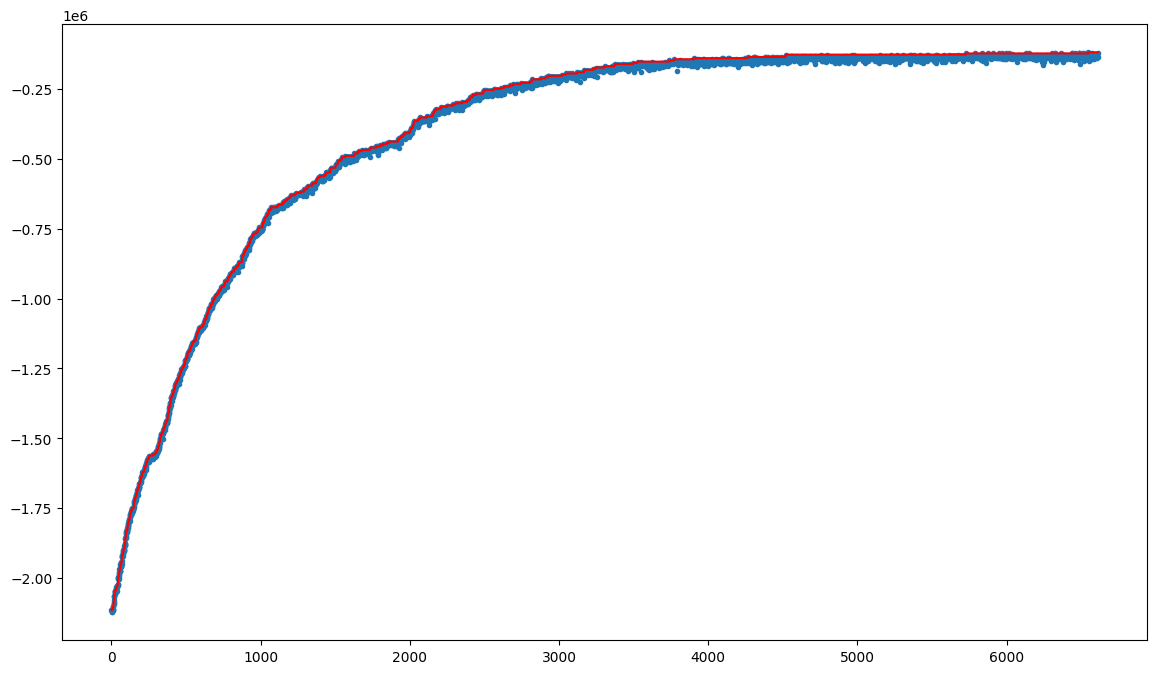

In [306]:
#indizio: usa tupla con number of covered items e cost invece che valid e cost

    #while index is None or np.random.random() < 0.4:
    #    index = np.random.randint(0, NUM_SETS)
    #    new_solution[index] = not new_solution[index]  
    #return new_solution

def single_tweak(solution: np.ndarray)-> np.ndarray:
    new_solution = solution.copy()
    i=rng.integers(0,NUM_SETS)
    new_solution[i]=not new_solution[i]
    return new_solution

def multiple_tweak(solution):
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < 0.4:
        index = np.random.randint(0, NUM_SETS)
        new_solution[index] = not new_solution[index]
    return new_solution

# ic(fitness(solution))
#solution = np.full(NUM_SETS, True)
solution = rng.random(NUM_SETS) < 0.5
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])]
ic(fitness(solution))
#tweak=single_tweak
tweak=multiple_tweak

N = 1000
n_improvement_steps = 0

for n in tqdm(range(MAX_STEPS)):
    new_solution = tweak(solution)
    f=fitness(new_solution)
    
    history.append(float(f[1]))
    if f > solution_fitness:
        solution = new_solution  
        solution_fitness=fitness(solution)
        n_improvement_steps = 0
    else :
        n_improvement_steps += 1

    #history.append(fitness(solution))

    if n_improvement_steps >= N:
        print("No improvement for", N, "steps. Stopping.")
        break

#ic(solution)
ic(valid(solution), cost(solution), fitness(solution))

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")
